<div style="text-align: center;">
    <h1>HOSPITALITY DATA ANALYTICS</h1>
</div>


# **DATA EXPLORATION**

In [1]:
import pandas as pd
df_booking = pd.read_csv("C:\\source-code\\3_project_hospitality_analysis\\datasets\\fact_bookings.csv")
df_booking.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [2]:
df_booking.shape

(134590, 12)

In [3]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [4]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [5]:
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

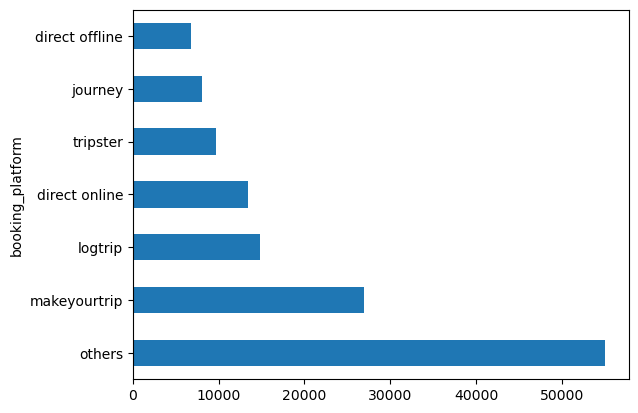

In [6]:
df_booking.booking_platform.value_counts().plot(kind='barh')

In [7]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [8]:
df_booking['revenue_generated'].min(),df_booking['revenue_generated'].max()

(6500, 28560000)

In [9]:
df_date = pd.read_csv("C:\\source-code\\3_project_hospitality_analysis\\datasets\\dim_date.csv")
df_hotels = pd.read_csv("C:\\source-code\\3_project_hospitality_analysis\\datasets\\dim_hotels.csv")
df_rooms = pd.read_csv("C:\\source-code\\3_project_hospitality_analysis\\datasets\\dim_rooms.csv")
df_agg_bookings = pd.read_csv("C:\\source-code\\3_project_hospitality_analysis\\datasets\\fact_aggregated_bookings.csv")

In [10]:
df_hotels.shape

(25, 4)

In [11]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [12]:
df_hotels['category'].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: ylabel='city'>

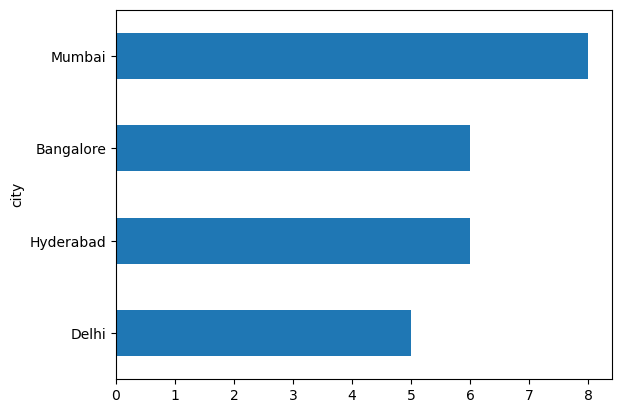

In [13]:
df_hotels['city'].value_counts().sort_values().plot(kind='barh')

In [14]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [15]:
df_agg_bookings['property_id'].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [16]:
g = df_agg_bookings.groupby('property_id')["successful_bookings"].sum()
g

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [17]:
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [18]:
df_agg_bookings[df_agg_bookings['capacity']==df_agg_bookings['capacity'].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# **DATA CLEANING**

In [19]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [20]:
df_booking[df_booking['no_guests']<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [21]:
df_booking.shape

(134590, 12)

In [22]:
df_booking = df_booking[df_booking['no_guests']>0]                      #removing records that have negative number of guests
df_booking.shape

(134578, 12)

In [23]:
df_booking['revenue_generated'].min(),df_booking['revenue_generated'].max()

(6500, 28560000)

In [24]:
avg, std = df_booking['revenue_generated'].mean(), df_booking['revenue_generated'].std()
avg , std                                                                                    #here std is one standard deviation

(15378.036937686695, 93040.15493143328)

In [25]:
higher_limit , lower_limit = avg + 3*std , avg - 3*std
higher_limit , lower_limit

(294498.50173198653, -263742.4278566132)

In [26]:
df_booking[df_booking['revenue_generated']<0]                        #checking if revenue_ggenerated column has its value as 0

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [27]:
df_booking[df_booking['revenue_generated']>higher_limit]                           #finding outliers in revenue_generated column

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [28]:
df_booking = df_booking[df_booking['revenue_generated']<higher_limit]
df_booking.shape                                                                  #removing outliers in revenue_generated column

(134573, 12)

In [29]:
df_booking['revenue_realized'].describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [30]:
avg1, std1 = df_booking['revenue_realized'].mean(), df_booking['revenue_realized'].std()
avg1 , std1    

(12695.983585117372, 6927.791692242509)

In [31]:
higher_limit1 = avg1 + 3*std1
higher_limit1                                    #higher limit1 > maximum value of revenue_realized => outliers could be present

33479.3586618449

In [32]:
df_booking[df_booking['revenue_realized']>higher_limit1]                       

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [33]:
#1299 rows have revenue_generated > higher_limit1 but almost all rows room_category is RT4 which is a presidential suite which
#(has higher rent than other suites) 

In [34]:
df_booking[df_booking['room_category']=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [35]:
high = 23439.308444 + 3*9048.599076
high                  #higher limit for RT4 room_category rows is ~ 50585. Thus, there are no outliers in revenue_realize column

50585.105672000005

In [36]:
df_booking.isnull().sum()              #ratings_given has 77897 NA values but it is alright as only very few people give ratings

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [37]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [38]:
df_agg_bookings = df_agg_bookings.fillna(df_agg_bookings['capacity'].mean())
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [39]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [40]:
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


# **DATA TRANSFORMATION**

In [41]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [42]:
df_agg_bookings['occ_pct'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947


In [43]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)                                                                             #transforming occ_pct column

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


# INSIGHTS GENERATION

**1. what is the average occupancy rate in each of the room categories?**

In [44]:
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [45]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [46]:
df = pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on ='room_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [47]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

In [48]:
df.drop('room_id',axis=1,inplace=True)
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard




**2. Printing average occupancy rate per city**

In [49]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [50]:
df.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard


In [51]:
df1 = pd.merge(df_hotels,df, on= 'property_id')
df1.head(2)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16,Standard


In [52]:
df1.groupby('city').occ_pct.mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

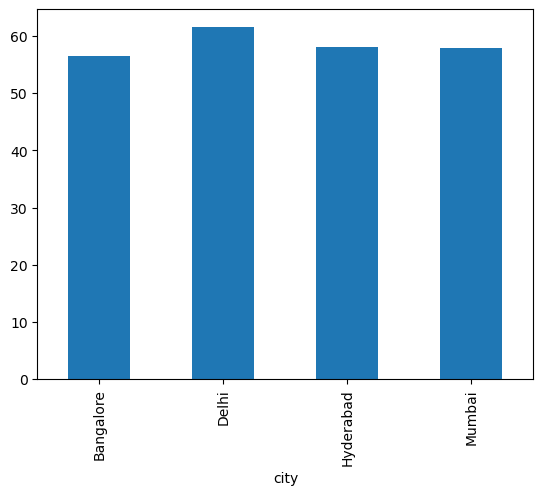

In [53]:
df1.groupby('city').occ_pct.mean().round(2).plot(kind='bar')

**3. When was the occupancy rate better? weekday or weekend?**

In [54]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [55]:
df1.head(2)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16,Standard


In [56]:
df2 = pd.merge(df1,df_date,left_on='check_in_date',right_on ='date')
df2.head(2)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,10-May-22,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,10-May-22,May 22,W 20,weekeday


In [57]:
df2.groupby('day_type').occ_pct.mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

**4.In the month of June, what was the occupancy for different cities?**

In [58]:
df2['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [59]:
df_june22 = df2[df2['mmm yy'] == 'Jun 22'].groupby('city').occ_pct.mean().round(2).sort_values(ascending=False)
df_june22

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

**4. adding august month data to the existigng dataframe**

In [60]:
df_august = pd.read_csv("C:\\source-code\\3_project_hospitality_analysis\\datasets\\new_data_august.csv")
df_august.head(2)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.0
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.0


In [61]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [62]:
df2.columns

Index(['property_id', 'property_name', 'category', 'city', 'check_in_date',
       'room_category', 'successful_bookings', 'capacity', 'occ_pct',
       'room_class', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [63]:
df_august.shape, df2.shape

((7, 13), (6500, 14))

In [64]:
latest_df = pd.concat([df2,df_august],ignore_index=True,axis=0)
latest_df.tail(4)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type,occ%
6503,19558,Atliq Grands,Luxury,Bangalore,01-Aug-22,RT1,30,40.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,Atliq City,Business,Bangalore,01-Aug-22,RT1,20,26.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,Atliq Blu,Luxury,Mumbai,01-Aug-22,RT1,18,26.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,Atliq Seasons,Business,Mumbai,01-Aug-22,RT1,10,16.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,62.50


In [65]:
latest_df.shape

(6507, 15)

**5. print revenue realised per city**

In [66]:
df_booking.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [67]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [68]:
df_rev = pd.merge(df_booking,df_hotels,on='property_id')
df_rev.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [69]:
df_rev.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**6.print month by month revenue**

In [70]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [71]:
latest_df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22', 'Aug-22'], dtype=object)

In [72]:
df_rev.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [73]:
pd.merge(df_rev,df_date,left_on='check_in_date',right_on='date')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [74]:
df_rev['check_in_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 134573 entries, 0 to 134572
Series name: check_in_date
Non-Null Count   Dtype 
--------------   ----- 
134573 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


In [75]:
df_date['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 92 entries, 0 to 91
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
92 non-null     object
dtypes: object(1)
memory usage: 868.0+ bytes


In [76]:
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.head(2)

C:\Users\Shreya\AppData\Local\Temp\ipykernel_11440\33639996.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date'] = pd.to_datetime(df_date['date'])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday


In [77]:
df_date['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 92 entries, 0 to 91
Series name: date
Non-Null Count  Dtype         
--------------  -----         
92 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 868.0 bytes


In [78]:
df_rev['check_in_date'] = pd.to_datetime(df_rev["check_in_date"],format='mixed')             
# The format='mixed' option is used in pd.to_datetime() to handle columns with mixed date formats.  
df_rev.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [79]:
df_rev['check_in_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 134573 entries, 0 to 134572
Series name: check_in_date
Non-Null Count   Dtype         
--------------   -----         
134573 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.0 MB


In [80]:
df_month = pd.merge(df_rev,df_date,left_on='check_in_date',right_on='date')
df_month.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [81]:
df_month.groupby('mmm yy')['revenue_realized'].sum().sort_values()

mmm yy
Jun 22    377191229
Jul 22    389940912
May 22    408375641
Name: revenue_realized, dtype: int64

**7.print revenue realize per hotel type**

In [82]:
df_month.groupby('property_name')['revenue_realized'].sum()

property_name
Atliq Bay        179416721
Atliq Blu        179203544
Atliq City       196555383
Atliq Exotica    219076161
Atliq Grands     145860641
Atliq Palace     209474575
Atliq Seasons     45920757
Name: revenue_realized, dtype: int64

**8.Print average rate per city**

In [83]:
df_month.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.40
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Name: ratings_given, dtype: float64

**9. Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

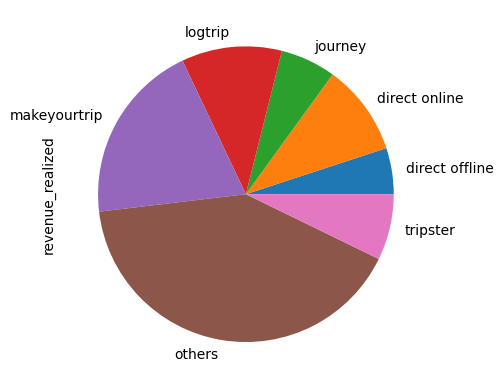

In [84]:
df_month.groupby("booking_platform")["revenue_realized"].sum().plot(kind ='pie')